# **FLAI - 7a Competição de ML**
jan/2022 - by Marcos Kunyosi

Este notebook foi criado inicialmente para gerar os primeiros resultados para serem submetifos à 7a competição FLAI de Machine Learning.

Contudo, como a competição foi interrompida, o notebook foi adaptado para ser usado principalmente por iniciantes da comunidade FLAI em machine learning como um "guia" para gerar os primeiros dados para uma competição de ML da FLAI.

Certamente a grande curiosidade para a maioria dos interessados é sobre qual é "segredo" que fez com que o resultado obtido fosse "muito bom" e levasse o Ricardo, criador da competição, a suspender a competição.

Eu poderia ir direto ao ponto e contar o segredo, porém preferi fazer algo diferente, procurando construir um "guia" e também contando o "segreto". Então, este documento apresenta a minha jornada de como criei a primeira submissão da 7a competição da FLAI.

Espero que você leitor, aproveite o conteúdo que preparei e faça comentários críticos apontando onde acertei e, principalmente, onde eu poderia ter feito melhor. Aguardarei o seu *feedback*!

Antes de partir para o que realmente interessa, faço abaixo alguns comentários explicando o padrão de escrita que utilizei neste documento.

Lembro que os **comentários** aqui apresentados são voltados para a Comunidade FLAI, assim,  eventualmente alguém de fora desse grupo pode não entender o porquê de algumas explicações.

Eu adoto a prática de escrever e comentar o código em inglês. Desenvolvi esse hábito trabalhando em empresas multinacionais onde era comum compartilhar material com colegas de outroas países. Dessa forma, dentro das áreas de código Python, os comentários estão em inglês, facilitando, assim, o compartilhamento do notebook em comunidades globais. 

Nas áreas de texto (markdown) o texto está em português.

O código deste notebook foi desenvolvido e testado no Google Colab. Não sei se a execução no Jupyter, rodando localmente em um computador, geraria algum resultado diferente.

## General Libraries

### General installs
*   PyCaret - AutoML </br>
*   Sweetviz


In [1]:
!pip install pycaret

!pip install sweetviz 

### General imports

In [2]:
# Importing data using pandas
import pandas as pd

# importing pycaret - AutoML
from pycaret.datasets import get_data

# importing visualization libs
import sweetviz as sv
import missingno as missing

#KNN imputer for missing data
import numpy as np
from sklearn.impute import KNNImputer


## Importing data sets

In [3]:
#importing data tables from public folder (github)
data_train_raw =  pd.read_csv('https://raw.githubusercontent.com/mkunyosi/FLAI-ML-DDS7/learning/treino.csv')
data_test_raw =  pd.read_csv('https://raw.githubusercontent.com/mkunyosi/FLAI-ML-DDS7/learning/teste.csv')


In [4]:
# for preserving original data tables while coding is not finished
# data for handling is copied to other variables
# that way it is possible easily to get to the original data and run other experiments

#copy data tables for handling in next steps
df_data_train = data_train_raw.copy()
df_data_test = data_test_raw.copy()

In [5]:
df_data_train.head()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,3220.0,B,A,C,A,B,A,-0.32,1.50,-0.82,0.78,1.18,3.32,0.80,0.53
1,3188.0,A,A,C,B,A,B,1.54,0.00,NaN,0.02,-0.18,-1.58,0.32,-0.90
2,3433.0,NaN,C,C,B,A,B,1.74,0.32,0.82,NaN,0.25,-1.80,0.92,0.09
3,3260.0,B,C,C,B,B,B,3.43,1.71,0.62,0.75,-0.25,-2.46,1.23,-1.63
4,3207.0,B,C,B,B,A,A,-2.12,-0.01,-0.53,0.86,-0.22,-2.55,0.67,5.33


In [6]:
# EDA - first visual analisys

# for some reason (probably a bug) if code below is run, KNNImputer fails to fulfill missing values

#eda = sv.analyze(source = df_data_train, target_feat = 'target')
#eda.show_notebook()

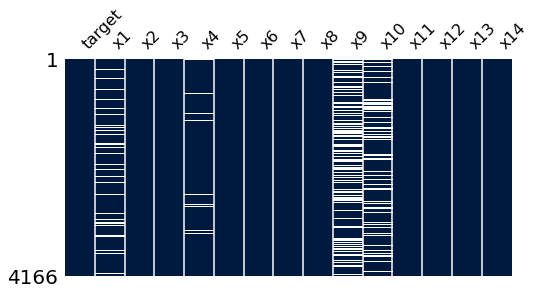

In [7]:
# checking missing data
missing.matrix(df_data_train, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

In [8]:
df_data_train.isnull().mean()

target    0.000000
x1        0.122180
x2        0.000000
x3        0.000000
x4        0.037686
x5        0.000000
x6        0.000000
x7        0.000000
x8        0.000000
x9        0.371099
x10       0.201392
x11       0.000000
x12       0.000000
x13       0.000000
x14       0.000000
dtype: float64

## Processing data

---
**Comentários**

Como este foi o primeiro notebook preparado para a competição de ML da FLAI, a ideia aqui era preparar a estrutura do código para outras análises mais detalhadas.

Dessa forma, não aprofundei a análise dos gráficos gerados pelo SweetViz, mas percebi que algumas variáveis apresentava dados nulos (NaN), então usei o *missing.matrix* e o *dados.isnull().mean()* para verificar onde havia falta de dados.

Caso a competição continuasse, o próximo passo seria analisar em detalhes os dados de treinamento e aplicar transformações necessárias para melhorar o modelos preditivos.

Ao rodar o PyCaret alguns algoritmos de ML apresentaram erro, pois havia NaN entre os dados. Para preencher os dados faltantes de uma forma rápida, usei o método de imputação de dados KNNImputer. De forma geral, o KNNImputer avalia os vizinhos próximos à célula que está vazia, usando a distância euclidiana, e faz seu o preenchimento com o valor médio dos vizinhos.

Na 6a. competição da FLAI, eu desconhecia essa biblioteca, então desenvolvi uma função que avaliava os vizinhos das células vazias e preenchia o campo com a média simples dos valores dos vizinhos. Na 7a competição, eu até poderia usar a função que criei anteriormente, porém preferi usar ferramentas "padronizadas e de conhecimento geral".

No DDS7, o Ricardo comenta sobre o KNNImputer no final de uma das aulas de preparação de dados. No DDS6, não me lembro de ter visto essa biblioteca. Provavelmente ele comentou, porém, pelo alto volume de conteúdo, não guardei esse detalhe. Aqui faço uma recomendação aos novos alunos: voltem às aulas gravadas e assistam tudo novamente. Sou da turma 6 e participei da 6a competição, fiquei com várias dúvidas, mas revendo as aulas da turma 7, minha cabeça deu um "boom" e pude compreender muito melhor vários detalhes de ML.

Voltando ao código, para usar a biblioteca KNNImputer utilizei como referência um artigo do Medium (ref. está no código). Apenas fiz algumas alterações em nomes de variáveis.
Para rodar o KNNImputer foi necessário damificar as variáveis categóricas.

Como as transformações nos dados deveriam ocorrer tanto nos dados de treino como nos dados de teste, criei uma função para encapsular essa tarefa e produzir um novo conjunto de dados sem "missing data".

Como neste estudo foi usado o PyCaret o KNNImputer não precisaria ser usado, pois o PyCaret já implementa o recurso. Entretanto, caso outras abordagens fossem usadas em vez do PyCaret os dados já estariam prontos para uso.

Vale ressaltar que em análises futuras talvez o KNNImputer não fosse considerado para preencher os dados faltantes. Contudo, para uma análise rápida, na verdade, a primeira análise, ele foi bastante prático.








In [9]:
# function: data_transform
#   Pipiline form input data (train and test)
#   - dummification
#   - imputation
# sample:
#   p_df = dados
#   cat_vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
# return:
#   new  dataframe
def data_transform(p_df, p_cat_vars):
    # ref.: A Guide To KNN Imputation - by Kyaw Saw Htoon
    #   https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
    
    # create categorical vars - dummification
    cat_variables = p_df[p_cat_vars]
    cat_dummies = pd.get_dummies(cat_variables, drop_first=True, dtype=float)    
    
    # drop original categorical vars and create a new data frame
    p_df = p_df.drop(p_cat_vars, axis=1)    
    p_df = pd.concat([p_df, cat_dummies], axis=1)

    # run KNNImputer for fulfilling missing values
    imputer = KNNImputer(n_neighbors=5)
    p_df2 = pd.DataFrame(imputer.fit_transform(p_df), columns = p_df.columns)
   
    return p_df2

In [10]:
# filling missing data

# set categorical variables
cat_vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

# run transformation for train and test data
df_data_train = data_transform(df_data_train, cat_vars)
df_data_test = data_transform(df_data_test, cat_vars)


In [11]:
# checking missing values
print(f"train data:\n{df_data_train.isnull().mean()}")
print()
print(f"test data:\n{df_data_train.isnull().mean()}")

train data:
target    0.0
x7        0.0
x8        0.0
x9        0.0
x10       0.0
x11       0.0
x12       0.0
x13       0.0
x14       0.0
x1_B      0.0
x1_C      0.0
x2_B      0.0
x2_C      0.0
x3_B      0.0
x3_C      0.0
x3_D      0.0
x4_B      0.0
x5_B      0.0
x6_B      0.0
dtype: float64

test data:
target    0.0
x7        0.0
x8        0.0
x9        0.0
x10       0.0
x11       0.0
x12       0.0
x13       0.0
x14       0.0
x1_B      0.0
x1_C      0.0
x2_B      0.0
x2_C      0.0
x3_B      0.0
x3_C      0.0
x3_D      0.0
x4_B      0.0
x5_B      0.0
x6_B      0.0
dtype: float64


---
## Machine Learning - PyCaret (first approach)

**Comentários**

Como primeira abordagem de Machine Learning utilizei o PyCaret, pois a ideia era analisar qual seria o EMA dos modelos e também testar a geração do arquivo de submissão.

Dessa forma, não foi utilizada nenhuma configuração especial no PyCaret, assim, utilizei as configurações padrões. 

In [12]:
from pycaret.regression import * 

In [13]:
#?setup

In [14]:
# setup
pc_regression = setup(data = df_data_train, 
                  target = 'target')

,Description,Value
0,session_id,560
1,Target,target
2,Original Data,"(4166, 19)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2916, 18)"


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [16]:
models().shape

(24, 3)

**Comentários**

Rodando o PyCaret no Google Colab foi possível avaliar 24 modelos de ML.

No próximo passo, ao comparar o MAE entre os modelos, fiz algumas experiências e preferi utilizar os "top 5" com melhores resultados.

Nos ensaios, o MAE desses top 5 ficou próximo de 84.

Nos primeiros ensaios alguns modelos apresentaram erro por haver dados faltantes, então decidi desconsiderar essas variáveis. Ao fazer isso todos os modelos apresentaram MAE superior a 100.

Depois que a estrutura do notebook estava mais completa dediquei mais esforços para não desconsiderar as variáveis, então passei a estudar o KNNIMputer, como feito na etapa de processamento de dados.

Com o preenchimento dos dados faltantes o MAE dos melhores modelos caiu para próximo de 84, ou seja, usando todas as variáveis obtive um MAE melhor.

In [17]:
# Comparing available models sorted by MAE metric (Mean Average Error)
# Selecting top 5 models to continue the evaluation
top5_models = compare_models(sort = 'MAE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,83.4320,11699.1624,108.0083,0.7190,0.0325,0.0252,0.059
br,Bayesian Ridge,83.9370,11588.9987,107.5153,0.7219,0.0324,0.0254,0.015
ridge,Ridge Regression,83.9555,11588.6209,107.5133,0.7219,0.0324,0.0254,0.013
lr,Linear Regression,83.9598,11588.9010,107.5146,0.7219,0.0324,0.0254,0.288
lar,Least Angle Regression,83.9598,11588.9011,107.5146,0.7219,0.0324,0.0254,0.017
lasso,Lasso Regression,84.2365,11692.9323,108.0011,0.7195,0.0325,0.0255,0.014
gbr,Gradient Boosting Regressor,85.6933,12488.4531,111.6417,0.7018,0.0333,0.0258,0.470
lightgbm,Light Gradient Boosting Machine,87.8673,13233.5046,114.8980,0.6847,0.0341,0.0264,0.167
par,Passive Aggressive Regressor,88.8122,13271.9980,115.1029,0.6824,0.0345,0.0268,0.021
et,Extra Trees Regressor,92.4676,14354.1809,119.6653,0.6583,0.0357,0.0278,1.126


**Comentários**

Confesso que não conheço os modelos que tiveram melhores resultados, porém como o intuito aqui era ser rápido e finalizar a primeira análise, não investiguei eventuais motivos que explicassem porquê esses modelos tiveram melhores desempenhos.

In [18]:
# Tuning top 5 models
top5_models_tuned = []

for i in range(len(top5_models)):
    top5_models_tuned.append(tune_model(top5_models[i], optimize = 'MAE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,83.4033,11663.7861,107.9990,0.6598,0.0325,0.0253
1,91.2213,13674.0161,116.9359,0.6649,0.0357,0.0281
2,83.0171,10611.2659,103.0110,0.7671,0.0310,0.0251
3,85.8465,11497.0703,107.2244,0.7441,0.0322,0.0259
4,86.1294,11875.4987,108.9748,0.7610,0.0328,0.0260
5,86.8400,13250.5290,115.1109,0.6365,0.0343,0.0261
6,82.6905,11140.2002,105.5471,0.7527,0.0319,0.0250
7,85.5062,12062.6261,109.8300,0.6797,0.0329,0.0256
8,75.5627,9917.9990,99.5892,0.7962,0.0300,0.0228
9,78.7316,10063.9008,100.3190,0.7594,0.0303,0.0238


In [19]:
# Mixing top 5 models
ensemble_model = blend_models(top5_models_tuned)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,83.3020,11662.9486,107.9951,0.6599,0.0325,0.0252
1,91.1108,13682.6502,116.9729,0.6647,0.0357,0.0280
2,82.9601,10606.5056,102.9879,0.7672,0.0310,0.0251
3,85.6155,11468.7571,107.0923,0.7447,0.0321,0.0258
4,86.3391,11943.7136,109.2873,0.7596,0.0330,0.0261
5,86.7664,13300.2951,115.3269,0.6351,0.0343,0.0261
6,82.5052,11114.0839,105.4234,0.7533,0.0318,0.0250
7,85.4081,12064.3366,109.8378,0.6796,0.0329,0.0256
8,75.2328,9877.4992,99.3856,0.7971,0.0300,0.0227
9,78.5433,10096.4286,100.4810,0.7586,0.0303,0.0238


In [20]:
# Displaying parameters for ensemble models on voting regressor
ensemble_model

VotingRegressor(estimators=[('huber',
                             HuberRegressor(alpha=0.005, epsilon=1.5,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('br',
                             BayesianRidge(alpha_1=0.15, alpha_2=0.15,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=0.15, lambda_2=0.01,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)),
                            ('...
                                   max_iter=None, normalize=False,
                                   random_state=560, solver='auto',
                              

In [21]:
# Evaluating final model
evaluate_model(ensemble_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predicting values

**Comentários**

Modelo pronto, então é hora de fazer as predições!

Primeiro avaliei o desempenho do modelo considerando os dados de treinamento. Nos ensaios, o resultado ficou um pouco pior dos verificados na validação cruzada.

Depois usei o modelo para fazer predição com os dados de teste, objeto da competição.

In [22]:
# Checking performance (MAE) using training data
pred = predict_model(ensemble_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,83.6007,11708.6938,108.2067,0.7296,0.0327,0.0253


In [23]:
# Double checking using another equation
abs(pred['Label']-pred['target']).mean()

83.60066489393239

In [24]:
# Predicting target values for test data
preds_test = predict_model(ensemble_model, data = df_data_test)

**Comentários**

Os resultados de *preds_test* poderiam ser submetidos na competição. Para tanto, bastaria seguir para o passo "Printing results".

Até aqui o MAE obtido na avaliação cruzada estava entre 82 e 84 e o MAE obtido com os dados de treinamento estava próximo de 86.

Dessa forma, minha expectativa para o MAE com os dados de teste era para ser próximo, ou superior, a 86.

Contudo, como na fase de inspeção dos dados tive alguns *insigths* fruto do livro *Data Science para Negócios*, antes de submeter o arquivo voltei nos dados originais de treinamento e teste para verificar se não havia dados repetidos. 

Bingo!

Encontrei 54% dos dados de teste na base de treinamento, ou seja, eu não precisava de um algoritmo para saber qual seria a resposta para esse conjunto de dados, bastava copiar a resposta!

Como o conjunto de dados era pequeno, as primeiras análise eu fiz no Excel, somente depois transferi o código para o Python.

A próxima seção é sobre como identificar linhas dos dados de testes nos dados de treinamento.

## The secret

**Comentários**

O "segredo" foi pensar "fora da caixa" e tentar soluções mais simples fora do contexto teórico de machine learning.

Nesta competição, apesar do Ricardo mascarar os dados, de alguma forma, muitos dados do conjunto de teste saíram idênticos aos dados do conjunto de treinamento. Como não havia regras que impedissem esse tipo de verificação, investi algum esforço para identificar as linhas repetidas e quais seriam os valores na variável resposta. Inclusive no lançamento da competição o Ricardo brinca dizendo que "até bola de cristal poderia ser usada", então eu lancei mão do super oráculo Excel, ferramenta faz-tudo que "virou uma lenda" ao término da 6a. competição de ML da FLAI.

Como para o conjunto de dados repetidos não há erro, ou seja, o MAE fica zerado, assim o MAE geral caiu sensivelmente.

Fazendo algumas análises, podemos, de fato, estimar o novo valor do MAE.

Considerando que o novo MAE pode ser escrito como uma soma ponderada dos MAEs das linhas encontradas no conjunto de treino e das linhas distintas, cujo valor depende do modelo de aprendizagem, podemos escrever a seguinte equação:

$\widehat{EMA}=w_r * EMA_r + w_o * EMA_o$

$\widehat{EMA}$: Novo EMA esperado se a linhas repetidas no conjuntos de teste e treino forem usadas para se obter o valor da variável resposta.

$EMA_r$: EMA para o conjunto de teste com linhas repetidas no conjunto de treinamento. Para esse conjunto o EMA vale 0.

$EMA_r$: EMA para o conjunto com as demais linhas do conjunto de teste as quais não tem iguais no conjutno de treinamento. Na média, esse valor tem o mesmo valor do EMA obtido na seção de predição dos dados, ou seja, 86.

$w_r$: percentual do número de linhas do conjunto de teste presente no conjunto de treino comparado com o conjunto total de teste. Esse valor, calculado mais a frente nesta seção foi da ordem de 54%.

$w_o$: percentual do número de linhas do conjunto de teste que não estão presente no conjunto de treinamento comparado com o conjunto total de teste. Esse valor também pode ser escrito como $(1 - w_r)$.

Substituindo os elementos da expressão anterior pelos respectivos valores, podemos calcular o $\widehat{EMA}$:

$\widehat{EMA}= 0,54 * 0 + (1 - 0,54) * 86$

$\widehat{EMA}=39,6$

Dessa forma, o novo EMA esperado, aplicando o "segredo", seria da ordem de 40. Fato confirmado com o ranking liberado pelo Ricardo após o envio da minha submissão.

Os próximos passos descrevem como fiz a análise do conjunto de teste comparados com o conjunto de treinamento. Finalizo a seção gerando novos dados para serem submetidos.

### Including a new column for agregating rows data

In [25]:
def createColAll(df, cols):  
  df['all'] = df[df.columns[0]].map(lambda x: "")
  for i in range(df.shape[0]):    
    for j in cols:
      if j not in ["all", "index"]:
        df['all'][i] = df['all'][i] + str(df[j][i])
  return df['all']


In [26]:
all_cols = ['x1', 'x2', 'x3',	'x4',	'x5',	'x6',	'x7',	'x8',	'x9',	'x10',	'x11',	'x12',	'x13',	'x14']

df_data_test_check = data_test_raw.copy()
df_data_test_check['all'] = createColAll(df_data_test_check, all_cols)

df_data_train_check = data_train_raw.copy()
df_data_train_check['all'] = createColAll(df_data_train_check, all_cols)


In [27]:
print(df_data_train_check.head())
print(df_data_test_check.head())

   target   x1 x2  ...   x13   x14                                          all
0  3220.0    B  A  ...  0.80  0.53       BACABA-0.321.5-0.820.781.183.320.80.53
1  3188.0    A  A  ...  0.32 -0.90       AACBAB1.540.0nan0.02-0.18-1.580.32-0.9
2  3433.0  NaN  C  ...  0.92  0.09      nanCCBAB1.740.320.82nan0.25-1.80.920.09
3  3260.0    B  C  ...  1.23 -1.63    BCCBBB3.431.710.620.75-0.25-2.461.23-1.63
4  3207.0    B  C  ...  0.67  5.33  BCBBAA-2.12-0.01-0.530.86-0.22-2.550.675.33

[5 rows x 16 columns]
    x1 x2 x3 x4  ...   x12   x13   x14                                        all
0    B  C  A  B  ... -1.06  1.51 -0.03  BCABAA0.370.171.170.62-0.13-1.061.51-0.03
1    C  C  A  A  ...  3.04  1.29  1.51   CCAABA1.72-0.042.840.25-0.253.041.291.51
2    C  C  B  B  ...  0.02  0.55  0.99   CCBBAA-0.310.51-0.970.241.670.020.550.99
3    B  C  C  A  ...  2.56  0.67  1.64      BCCABB-0.090.01nan2.250.22.560.671.64
4  NaN  B  D  B  ... -1.02  0.50  0.42  nanBDBBA1.85-0.03-1.34nan1.42-1.020.50.42

[5 r

### Searching for the row in training set

In [29]:
df_data_test_check['idx'] = df_data_test_check['all'].map(lambda x: -1)
for i in range(df_data_test_check.shape[0]):
  res = df_data_train_check[df_data_train_check['all'] == df_data_test_check['all'][i]]
  if res.shape[0] >= 1:
    df_data_test_check['idx'][i] = res.index[0]
    if res.shape[0] > 1:
      print("see item ({}) - {}". format(i, df_data_test_check['all'][i]))  

df_data_test_check

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,all,idx
0,B,C,A,B,A,A,0.37,0.17,1.17,0.62,-0.13,-1.06,1.51,-0.03,BCABAA0.370.171.170.62-0.13-1.061.51-0.03,-1
1,C,C,A,A,B,A,1.72,-0.04,2.84,0.25,-0.25,3.04,1.29,1.51,CCAABA1.72-0.042.840.25-0.253.041.291.51,1714
2,C,C,B,B,A,A,-0.31,0.51,-0.97,0.24,1.67,0.02,0.55,0.99,CCBBAA-0.310.51-0.970.241.670.020.550.99,-1
3,B,C,C,A,B,B,-0.09,0.01,NaN,2.25,0.20,2.56,0.67,1.64,BCCABB-0.090.01nan2.250.22.560.671.64,-1
4,NaN,B,D,B,B,A,1.85,-0.03,-1.34,NaN,1.42,-1.02,0.50,0.42,nanBDBBA1.85-0.03-1.34nan1.42-1.020.50.42,3587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,NaN,B,A,B,A,B,-1.30,-0.24,NaN,NaN,1.49,1.41,1.08,-1.20,nanBABAB-1.3-0.24nannan1.491.411.08-1.2,-1
3727,C,C,D,B,A,B,1.57,0.12,4.90,1.95,3.70,-2.40,1.71,2.50,CCDBAB1.570.124.91.953.7-2.41.712.5,1879
3728,A,C,B,B,B,B,2.32,-0.22,NaN,0.43,-0.15,-2.16,2.43,-1.19,ACBBBB2.32-0.22nan0.43-0.15-2.162.43-1.19,3755
3729,B,B,B,B,A,B,0.71,1.81,NaN,0.14,7.44,-1.01,1.77,-0.36,BBBBAB0.711.81nan0.147.44-1.011.77-0.36,1634


### Calculating number of rows of test set present on training set

In [33]:
rows_total = float(df_data_test_check.shape[0])
rows_found = float(df_data_test_check[df_data_test_check['idx'] != -1].shape[0])
rows_percent = rows_found / rows_total

print("Test data (number of rows)")
print(f"Total: {rows_total}")
print("Present on training set: {} rows, corresponding to {:.1f}% of the total".format(rows_found, rows_percent * 100))


Test data (number of rows)
Total: 3731.0
Present on training set: 2012.0 rows, corresponding to 53.9% of the total


### Updating testing data

In [34]:
df_data_test_check['target'] = df_data_test_check['idx'].map(lambda x: df_data_train_check['target'][x] if x >= 0 else 0.0)
for i in range(df_data_test_check.shape[0]):
  if df_data_test_check['idx'][i] == -1:
    df_data_test_check['target'][i] = preds_test['Label'][i]

df_data_test_check


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,all,idx,target
0,B,C,A,B,A,A,0.37,0.17,1.17,0.62,-0.13,-1.06,1.51,-0.03,BCABAA0.370.171.170.62-0.13-1.061.51-0.03,-1,3223.438098
1,C,C,A,A,B,A,1.72,-0.04,2.84,0.25,-0.25,3.04,1.29,1.51,CCAABA1.72-0.042.840.25-0.253.041.291.51,1714,3239.000000
2,C,C,B,B,A,A,-0.31,0.51,-0.97,0.24,1.67,0.02,0.55,0.99,CCBBAA-0.310.51-0.970.241.670.020.550.99,-1,3242.328774
3,B,C,C,A,B,B,-0.09,0.01,NaN,2.25,0.20,2.56,0.67,1.64,BCCABB-0.090.01nan2.250.22.560.671.64,-1,3295.338249
4,NaN,B,D,B,B,A,1.85,-0.03,-1.34,NaN,1.42,-1.02,0.50,0.42,nanBDBBA1.85-0.03-1.34nan1.42-1.020.50.42,3587,3091.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,NaN,B,A,B,A,B,-1.30,-0.24,NaN,NaN,1.49,1.41,1.08,-1.20,nanBABAB-1.3-0.24nannan1.491.411.08-1.2,-1,3227.932200
3727,C,C,D,B,A,B,1.57,0.12,4.90,1.95,3.70,-2.40,1.71,2.50,CCDBAB1.570.124.91.953.7-2.41.712.5,1879,3669.000000
3728,A,C,B,B,B,B,2.32,-0.22,NaN,0.43,-0.15,-2.16,2.43,-1.19,ACBBBB2.32-0.22nan0.43-0.15-2.162.43-1.19,3755,3278.000000
3729,B,B,B,B,A,B,0.71,1.81,NaN,0.14,7.44,-1.01,1.77,-0.36,BBBBAB0.711.81nan0.147.44-1.011.77-0.36,1634,3666.000000


In [35]:
preds_test['Label'] = df_data_test_check['target']

## Printing results

In [36]:
preds_test['Label']

0       3223.438098
1       3239.000000
2       3242.328774
3       3295.338249
4       3091.000000
           ...     
3726    3227.932200
3727    3669.000000
3728    3278.000000
3729    3666.000000
3730    2983.610970
Name: Label, Length: 3731, dtype: float64

In [51]:
preds_test_csv = preds_test.to_csv()

In [52]:
# Preparing data to be submitted

subm = pd.DataFrame()
subm['target'] = preds_test['Label']

In [53]:
# writing the 'cvs' file

subm.to_csv('submission.csv', index = False)

## Saving model for future usage

In [55]:
# Finalizing final model to be exported
finalized_model = finalize_model(ensemble_model)

In [57]:
# Saving final model (pickle file)
save_model(finalized_model, 'model-01');

Transformation Pipeline and Model Successfully Saved


---

## Using saved model - loading and predicting

In [58]:
# Loadind saved model
model_ML = load_model('model-01')

Transformation Pipeline and Model Successfully Loaded


In [60]:
# Preparing data to be used on prediction
df_test = data_test_raw.copy()
cat_vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
df_test = data_transform(df_test, cat_vars)


In [61]:
# using recovered model to predict values
preds_test_FromSavedModel = predict_model(model_ML, data = df_test)

In [63]:
# saving new prediction on 'cvs' file
preds_test_FromSavedModel_csv = preds_test_FromSavedModel.to_csv()
subm = pd.DataFrame()
subm['target'] = preds_test_FromSavedModel['Label']
subm.to_csv('results-01.csv', index = False)

---